### 处理原始数据

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_raw = pd.read_csv('movie_comments.csv')
data_raw.head(3)

D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,link,name,comment,star
0,1,https://movie.douban.com/subject/26363254/,战狼2,吴京意淫到了脑残的地步，看了恶心想吐,1
1,2,https://movie.douban.com/subject/26363254/,战狼2,首映礼看的。太恐怖了这个电影，不讲道理的，完全就是吴京在实现他这个小粉红的英雄梦。各种装备轮...,2
2,3,https://movie.douban.com/subject/26363254/,战狼2,吴京的炒作水平不输冯小刚，但小刚至少不会用主旋律来炒作…吴京让人看了不舒服，为了主旋律而主旋...,2


In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261497 entries, 0 to 261496
Data columns (total 5 columns):
id         261497 non-null object
link       261497 non-null object
name       261497 non-null object
comment    261495 non-null object
star       261497 non-null object
dtypes: object(5)
memory usage: 10.0+ MB


In [18]:
data_raw.dropna(inplace=True)

data_raw.describe()

,id,link,name,comment,star
count,261495,261495,261495,261495,261495
unique,260148,2761,2760,213970,11
top,19,https://movie.douban.com/subject/1849031/,当幸福来敲门 The Pursuit of Happyness,经典,4
freq,6,396,396,200,43002


In [17]:
# data_raw.groupby('star').sum()
from collections import Counter

count = Counter(data_raw.star)
count

Counter({'1': 12255,
         '2': 14299,
         '4': 40806,
         '5': 31947,
         '3': 31762,
         'star': 1,
         4: 43002,
         3: 33910,
         5: 27368,
         2: 13837,
         1: 12308})

In [32]:
data_raw['star'].where(lambda x: x == 'star').dropna()

568    star
Name: star, dtype: object

In [37]:
data_raw.drop(index=568, inplace=True)

In [38]:
count = Counter(data_raw.star)
count

Counter({'1': 12255,
         '2': 14299,
         '4': 40806,
         '5': 31947,
         '3': 31762,
         4: 43002,
         3: 33910,
         5: 27368,
         2: 13837,
         1: 12308})

In [41]:
data_raw.star = data_raw.star.apply(int)

In [42]:
count = Counter(data_raw.star)
count

Counter({1: 24563, 2: 28136, 4: 83808, 5: 59315, 3: 65672})

In [47]:
trainning_data = data_raw.loc[:, ['comment', 'star']]
trainning_data.sample(5)

,comment,star
128050,片子很一般，but Bogart and Hepburn……,4
44920,眼睛瞪那么大,3
214823,优酷上支离破碎的84分钟阉割版，完全不连贯的剧情，简直了…去死。,2
87569,看了少说也有五六遍,4
3769,剧情、台词太差了，男主还是帅的，娜娜进步了,3


### 文本清洗

In [2]:
import jieba
import re
from tqdm import tqdm_notebook
from IPython.display import clear_output


tqdm_notebook().pandas()
clear_output()

def process_stop_word(path):
    
    stop_words = []
    with open(path, encoding='utf-8') as f:
        stop_words = f.read().split('\n')
    
    return stop_words
    

def clean_not_chinese(data):
    """
    data--data_Series
    """
    re_data = []
    for i in data:
        i_re = ''.join(re.findall(r'[\u4e00-\u9fa5]', i))
        re_data.append(i_re.strip())
    return re_data
    

def tokenize(content, stop_words):
    jieba_cut = jieba.cut(content)
    
    tokens = ''
    for i in jieba_cut:
        if i not in stop_words:
            tokens += ' ' + i
            
    tokens = tokens.strip()
    
    return tokens


def pre_process(data_, stop_words_path):
    """complete process"""
    stop_words = process_stop_word(stop_words_path)

    data_['comment'] = clean_not_chinese(data_['comment'])
    data_['tokens'] = data_['comment'].progress_apply(
                                                       lambda content: tokenize(content, stop_words))
    
    return data_

In [52]:
data_ = pre_process(trainning_data, 'chinese_stopwords.txt')
data_.sample(3)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\qw\AppData\Local\Temp\jieba.cache
Loading model cost 1.053 seconds.
Prefix dict has been built succesfully.


,comment,star,tokens
39019,帅,4,帅
163969,昨晚捧着碗吃面看的除了外景和配乐不能再多了,2,昨晚 捧 碗 吃面 看 除了 外景 配乐 不能
36235,喜欢没办法再讨厌也要给五星理科强强强生物强强强加大团圆结局不给五星不行,5,喜欢 没 办法 讨厌 五星 理科 强强 强 生物 强强 强加 大团圆 结局 五星 不行


In [ ]:
data_.to_csv('cleaned_data.csv')

In [57]:
del trainning_data
del data_raw

### 加载预训词向量

In [3]:
data_ = pd.read_csv('cleaned_data.csv')
data_.dropna(inplace=True)

In [14]:
# from collections import defaultdict


# word_to_index = defaultdict()
# for sentence in data_.tokens.values:
#     for word in sentence.split():
        
#         if word in word_to_index:
#             continue
        
#         word_to_index[word] = len(word_to_index)

# len(word_to_index)

In [4]:
with open('sgns.weibo.char', 'r', encoding='utf-8') as f:
    line = f.readlines()
    word_total = line[0][0]
    dim = line[0][1]
    
    word_to_vec = {}
    for vec in tqdm_notebook(line[1: ]):
        list_ = vec.split()
        word_to_vec[list_[0]] = np.asarray(list_[1: ], dtype=float)

In [5]:
len(word_to_vec)

195195

### Tensorflow模型搭建

模型处理，将情感分类，按星级划分。如果降低粒度，可以将三星以下作为负类情感，三星以上为正类情感。那么模型的准确率指标也会相应提高

数据最好经过长度筛选。（下文的训练结果是在未筛选的数据上训练的，同时模型出现较明显过拟合。当然在该数据条件下，神经网络需要进一步调优，不然很容易出现过拟合）

这么处理是为了网络的输入，但是确实会损失一些数据。

但是，不这样处理，pad太多的【0】对网络的效果影响较大。

如下文中的结果所示。

另外，下位结果是5分类的准确率。转化成2分类效果会很不一样。

同时简单模型并不需要这么多条数据，尤其是神经网络这种很容易过拟合的模型

In [6]:
import json
import tensorflow as tf  # 1.13.1
import random
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

#### 超参数

In [7]:
# vocab_size = 100000  # 选择词表大小
embedding_dim = 300
max_length = 24
trunc_type='post'  # 向后padding
padding_type='post'  # 向后截断
oov_tok = "<OOV>"
training_size=160000
test_portion=.1

#### 序列处理

In [9]:
# 训练数据
sentences = data_.tokens.values
labels = data_.star.values

In [10]:
# tokenize 注意使用空格隔开词与词
tokenizer = Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(sentences)

# word 与 index的映射
word_index = tokenizer.word_index
vocab_size=len(word_index)

# word转ndex
sequences = tokenizer.texts_to_sequences(sentences)

长度变化分析，建议删除极端数据

In [11]:
length_list = list(map(len, sequences))
sum(length_list) / len(length_list)

11.443650368252834

In [35]:
sequences[: 10]

[[1581, 1564, 1457, 2207, 2, 426, 27, 697],
 [8200,
  2,
  9,
  705,
  3,
  25493,
  51,
  1581,
  1642,
  29,
  8497,
  194,
  477,
  4690,
  14415,
  15665,
  11187,
  5803,
  248,
  6361,
  628,
  2151,
  42,
  2541,
  7782],
 [1581,
  5407,
  490,
  7538,
  1643,
  77911,
  438,
  106,
  427,
  5407,
  1581,
  2,
  695,
  427,
  427,
  311,
  311,
  19,
  483,
  1732,
  784,
  4508,
  17,
  260,
  177,
  6362,
  2406,
  260,
  184,
  611,
  135,
  9048,
  126,
  201,
  370,
  483,
  427,
  311,
  360,
  9674,
  1510],
 [44548, 39, 1723, 10130, 597, 27732, 6362, 2406],
 [33766],
 [2419, 6753, 12989, 9263, 1581, 1919, 206, 532, 1564, 17852],
 [1511, 133, 155, 135],
 [148,
  171,
  11830,
  2020,
  3135,
  427,
  3566,
  15011,
  15666,
  5479,
  43,
  231,
  17049,
  1581,
  1658,
  193,
  1956,
  54508,
  27733,
  11188,
  5220,
  12186,
  2273,
  1174,
  2142,
  30385,
  2219,
  10131,
  629,
  8344,
  44549,
  27734,
  25494,
  136,
  326,
  334,
  345,
  960,
  38188,
  3599,
  8

In [36]:
length_list[: 10]

[8, 25, 41, 8, 1, 10, 4, 44, 55, 45]

(0, 100)

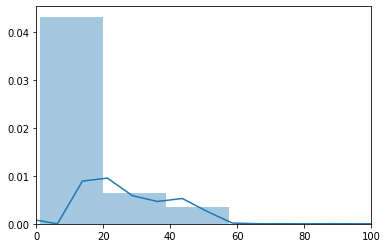

In [39]:
import seaborn as sns

ax = sns.distplot(length_list)
plt.xlim((0, 100))

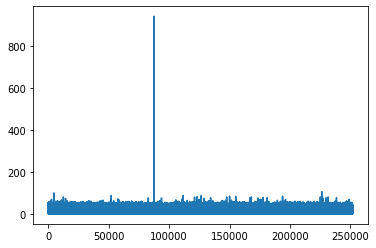

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(length_list)
# plt.ylim((0, 40))

这么处理是为了网络的输入，但是确实会损失一些数据。

但是，不这样处理，pad太多的【0】对网络的效果影响较大。

如下文中的结果所示。

另外，下位结果是5分类的准确率。转化成2分类效果会很不一样。

同时简单模型并不需要这么多条数据，尤其是神经网络这种很容易过拟合的模型

In [ ]:
# seqs = []

# for seq in sequences:
#     if len(seq) < 10 and len(seq) > 40:
#         continue
#     seqs.append(seq)

In [12]:
# 序列补齐，注意有需要时使用bucket，建立不同的length输入
padded = pad_sequences(sequences, 
                                           maxlen=max_length, 
                                           padding=padding_type, 
                                           truncating=trunc_type)

#### 训练集与测试集

In [13]:
split = int(test_portion * training_size)

test_sequences = padded[: training_size][0: split]
training_sequences = padded[: training_size][split: training_size]

test_labels = labels[: training_size][0: split]
training_labels = labels[: training_size][split: training_size]

#### 预训练词向量赋值

In [14]:
embeddings_matrix = np.zeros((vocab_size+1, embedding_dim))

for word, i in word_index.items():
    embedding_vec = word_to_vec.get(word)
    if embedding_vec is not None:
        embeddings_matrix[i] = embedding_vec

In [15]:
embeddings_matrix.shape

(143045, 300)

#### label处理

In [16]:
test_labels[: 10]

array([1, 2, 2, 4, 1, 1, 2, 4, 4, 1], dtype=int64)

In [17]:
# y要求从0 到 num_classes
test_labels = to_categorical(test_labels - 1, num_classes=5)
training_labels = to_categorical(training_labels - 1, num_classes=5)

In [18]:
training_labels.shape

(144000, 5)

In [19]:
test_labels.shape

(16000, 5)

#### model

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, 
                                              embedding_dim, 
                                              input_length=max_length, 
                                              weights=[embeddings_matrix], 
                                              trainable=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(128, 5, activation='relu'), 
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.AvgPool1D(pool_size=2),
    # tf.keras.layers.LSTM(128, 
    #                                  kernel_constraint=tf.keras.constraints.MaxNorm(2.)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, 
                                      kernel_regularizer=regularizers.l2(0.01),
                                      activation='softmax'),

    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(loss='categorical_crossentropy', 
                         optimizer='adam',
                         metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 24, 300)           42913500  
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 300)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 20, 128)           192128    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 10, 128)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 8, 64)             24640     
_________________________________________________________________
average_pooling1d_1 (Average (None, 4, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
__________

In [29]:
num_epochs = 20

history = model.fit(training_sequences,
                               training_labels,
                               epochs=num_epochs,
                               validation_data=(test_sequences, test_labels), 
                               verbose=2)

Train on 144000 samples, validate on 16000 samples
Epoch 1/20
 - 24s - loss: 1.2327 - acc: 0.4533 - val_loss: 1.2806 - val_acc: 0.4291
Epoch 2/20
 - 24s - loss: 1.2014 - acc: 0.4709 - val_loss: 1.4462 - val_acc: 0.3604
Epoch 3/20
 - 24s - loss: 1.1728 - acc: 0.4842 - val_loss: 1.3893 - val_acc: 0.3837
Epoch 4/20
 - 25s - loss: 1.1486 - acc: 0.4956 - val_loss: 1.3682 - val_acc: 0.3987
Epoch 5/20
 - 26s - loss: 1.1278 - acc: 0.5082 - val_loss: 1.4168 - val_acc: 0.3824
Epoch 6/20
 - 27s - loss: 1.1110 - acc: 0.5170 - val_loss: 1.4451 - val_acc: 0.3714
Epoch 7/20
 - 26s - loss: 1.0938 - acc: 0.5265 - val_loss: 1.4261 - val_acc: 0.3824
Epoch 8/20
 - 26s - loss: 1.0794 - acc: 0.5330 - val_loss: 1.4649 - val_acc: 0.3745
Epoch 9/20
 - 27s - loss: 1.0682 - acc: 0.5384 - val_loss: 1.4235 - val_acc: 0.3951
Epoch 10/20
 - 25s - loss: 1.0568 - acc: 0.5442 - val_loss: 1.4343 - val_acc: 0.3899
Epoch 11/20
 - 25s - loss: 1.0450 - acc: 0.5508 - val_loss: 1.4885 - val_acc: 0.3834
Epoch 12/20
 - 25s - lo

In [ ]:
# import matplotlib.image  as mpimg
# import matplotlib.pyplot as plt

# #-----------------------------------------------------------
# # Retrieve a list of list results on training and test data
# # sets for each training epoch
# #-----------------------------------------------------------
# acc=history.history['acc']
# val_acc=history.history['val_acc']
# loss=history.history['loss']
# val_loss=history.history['val_loss']

# epochs=range(len(acc)) # Get number of epochs

# #------------------------------------------------
# # Plot training and validation accuracy per epoch
# #------------------------------------------------
# plt.plot(epochs, acc, 'r')
# plt.plot(epochs, val_acc, 'b')
# plt.title('Training and validation accuracy')
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy")
# plt.legend(["Accuracy", "Validation Accuracy"])

# plt.figure()

# #------------------------------------------------
# # Plot training and validation loss per epoch
# #------------------------------------------------
# plt.plot(epochs, loss, 'r')
# plt.plot(epochs, val_loss, 'b')
# plt.title('Training and validation loss')
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.legend(["Loss", "Validation Loss"])

# plt.figure()